In [54]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from warnings import filterwarnings
%matplotlib inline
filterwarnings('ignore')

In [55]:
servo_data = pd.read_csv('servo.data')
names = pd.read_table('servo.names', sep=':')

In [56]:
servo_data

,E,E.1,5,4,0.28125095
0,B,D,6,5,0.506252
1,D,D,4,3,0.356251
2,B,A,3,2,5.500033
3,D,B,6,5,0.356251
4,E,C,4,3,0.806255
...,...,...,...,...,...
161,B,C,3,2,4.499986
162,B,E,3,1,3.699967
163,C,D,4,3,0.956256
164,A,B,3,2,4.499986


### Анализ имеющихся данных:

In [57]:
names.head()

,1. Title,Servo Data
0,2. Sources,NaN
1,(a) Created by,Karl Ulrich (MIT) in 1986
2,(b) Donor,Ross Quinlan
3,(c) Date,May 1993
4,3. Past Usage,NaN


In [58]:
summary_stats = servo_data.describe()
print(summary_stats)

missing_values = servo_data.isnull().sum()
print("Missing Values:\n", missing_values)

                5          4   0.28125095
count  166.000000  166.00000   166.000000
mean     4.150602    2.53012     1.396386
std      1.018719    1.36925     1.561958
min      3.000000    1.00000     0.131250
25%      3.000000    1.00000     0.506252
50%      4.000000    2.00000     0.750004
75%      5.000000    4.00000     1.279683
max      6.000000    5.00000     7.100108
Missing Values:
 E              0
E.1            0
5              0
4              0
 0.28125095    0
dtype: int64


In [59]:
unique_values = servo_data.nunique()
print("Unique Values:\n", unique_values)

Unique Values:
 E               5
E.1             5
5               4
4               5
 0.28125095    51
dtype: int64


In [60]:
missing_values_info = names.isnull().sum()
print("Missing Values in Additional Information:\n", missing_values_info)

Missing Values in Additional Information:
 1. Title        0
 Servo Data    35
dtype: int64


In [61]:
# Display the columns of the 'names' DataFrame
print("Columns of 'names' DataFrame:\n", names.columns)


Columns of 'names' DataFrame:
 Index(['1. Title', ' Servo Data'], dtype='object')


In [62]:
# Explore unique values in the '1. Title' column of the 'names' DataFrame
unique_values_title = names['1. Title'].unique()
print("Unique Values in '1. Title' Column of 'names':\n", unique_values_title)

Unique Values in '1. Title' Column of 'names':
 ['2. Sources' '   (a) Created by' '   (b) Donor' '   (c) Date'
 '3. Past Usage'
 '   1.  Quinlan, J.R., "Learning with continuous classes", Proc. 5th Australian'
 '       Joint Conference on AI (eds A. Adams and L. Sterling), Singapore'
 '       Scientific, 1992'
 '   2.  Quinlan, J.R., "Combining instance-based and model-based learning",'
 "       Proc. ML'93 (ed P.E. Utgoff), San Mateo"
 '       Results on 10-way cross-validation'
 '       Method\t\t\tAverage\t\tRelative'
 '       ------\t\t\t |Err|\t\t Error' ' \t\t\t\t-------\t\t--------'
 '       Guessing mean\t\t  1.15\t\t  1.00'
 '       Instance-based\t\t   .52\t\t   .26'
 '       Regression\t\t   .86\t\t   .49'
 '       Model trees\t\t   .45\t\t   .29'
 '       Neural nets (G. Hinton)\t   .30\t\t   .11'
 '       Regression+instances\t   .48\t\t   .20'
 '       Model trees+instances\t   .30\t\t   .17'
 '       NN+instances\t\t   .29\t\t   .11' '4. Relevant Information'
 '   Ross Q

In [63]:
title_column = names['1. Title']

unique_values_title_series = pd.Series(unique_values_title)

section_titles = unique_values_title_series[unique_values_title_series.apply(lambda x: str(x)[0].isdigit())]

print("Section Titles:\n", section_titles)

Section Titles:
 0                      2. Sources
4                   3. Past Usage
22        4. Relevant Information
39         5. Number of Instances
40        6. Number of Attributes
41       7. Attribute information
47    8. Missing Attribute Values
dtype: object


In [64]:
# Assuming 'names' DataFrame contains your data
# Drop rows with NaN values in the 'Servo Data' column
names = names.dropna(subset=[' Servo Data'])

# Display the modified DataFrame
print(names)

                                             1. Title  \
1                                      (a) Created by   
2                                           (b) Donor   
3                                            (c) Date   
6          Joint Conference on AI (eds A. Adams an...   
9             Proc. ML'93 (ed P.E. Utgoff), San Mateo   
39                             5. Number of Instances   
40                            6. Number of Attributes   
42                                           1. motor   
43                                           2. screw   
44                                           3. pgain   
45                                           4. vgain   
46                                           5. class   
47                        8. Missing Attribute Values   

                      Servo Data  
1      Karl Ulrich (MIT) in 1986  
2                   Ross Quinlan  
3                       May 1993  
6                          World  
9           Morgan Kaufman

В итоге, можем на основе этих данных сделать вывод, что для анализа нам необходимы данные: motor, screw, pgain, vgain, class.

In [65]:
import pandas as pd

# Read column names from 'servo.names'
names = pd.read_table('servo.names', sep=':')

# Extract column names from the 'names' DataFrame
column_names = names.iloc[:, 0].str.strip().tolist()

# Read the 'servo.data' file with proper column names
servo_data = pd.read_csv('servo.data', names=column_names)

# Display the DataFrame
print(servo_data)


    2. Sources (a) Created by  (b) Donor  (c) Date  3. Past Usage  \
0            E              E          5         4       0.281251   
1            B              D          6         5       0.506252   
2            D              D          4         3       0.356251   
3            B              A          3         2       5.500033   
4            D              B          6         5       0.356251   
..         ...            ...        ...       ...            ...   
162          B              C          3         2       4.499986   
163          B              E          3         1       3.699967   
164          C              D          4         3       0.956256   
165          A              B          3         2       4.499986   
166          A              A          6         5       0.806255   

     1.  Quinlan, J.R., "Learning with continuous classes", Proc. 5th Australian  \
0                                                  NaN                             
1  

In [66]:
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import pandas as pd

servo_data = pd.read_csv('servo.data', header=None, names=['motor', 'screw', 'pgain', 'vgain', 'class'])
servo_data['class'] = servo_data['class'].astype(float)

X = servo_data[['pgain', 'vgain']]
y = servo_data['class']

kde = KernelDensity()
parameters = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(kde, parameters)
grid.fit(X)

regression = grid.best_estimator_

new_data_point = np.array([[5, 4]])
estimated_value = np.exp(regression.score_samples(new_data_point))[0]
print(f"Оценочная стоимость: {estimated_value}")

Оценочная стоимость: 2.0966519449231713


### Пример тестовых данных на графике:

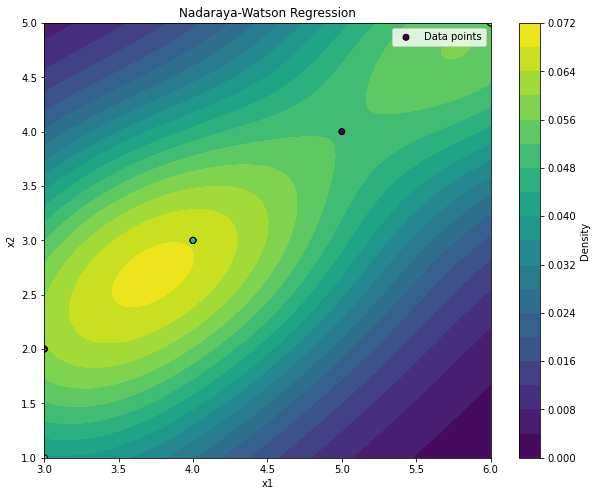

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Загрузка данных
data = pd.DataFrame({
    'E': ['B', 'D', 'B', 'D', 'E', 'B', 'B', 'C', 'A', 'A'],
    'E.1': ['D', 'D', 'A', 'B', 'C', 'A', 'E', 'D', 'B', 'A'],
    'x1': [5, 6, 4, 6, 4, 3, 3, 4, 3, 6],
    'x2': [4, 5, 3, 5, 3, 2, 1, 3, 2, 5],
    'y': [0.28125095, 0.506252, 0.356251, 5.500033, 0.356251, 0.806255, 4.499986, 3.699967, 0.956256, 4.499986]
})

# Выборка данных
X = data[['x1', 'x2']]
y = data['y']

# Определение модели
kde = KernelDensity(bandwidth=1.0)
kde.fit(X)

# Создание сетки для построения контурного графика
x1_min, x1_max = X['x1'].min(), X['x1'].max()
x2_min, x2_max = X['x2'].min(), X['x2'].max()
x1_range = np.linspace(x1_min, x1_max, 100)
x2_range = np.linspace(x2_min, x2_max, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
xy_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]

log_density = kde.score_samples(xy_grid)
density = np.exp(log_density).reshape(x1_grid.shape)

plt.figure(figsize=(10, 8))
contour = plt.contourf(x1_grid, x2_grid, density, cmap='viridis', levels=20)
plt.scatter(X['x1'], X['x2'], c=y, cmap='viridis', edgecolors='k', marker='o', label='Data points')
plt.colorbar(contour, label='Density')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Nadaraya-Watson Regression')
plt.legend()
plt.show()

### Разброс реальных данных на графике:

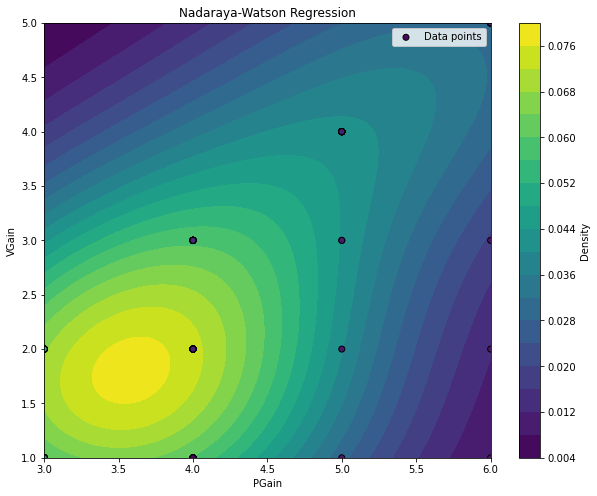

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import pandas as pd

servo_data = pd.read_csv('servo.data', header=None, names=['motor', 'screw', 'pgain', 'vgain', 'class'])
servo_data['class'] = servo_data['class'].astype(float)

X = servo_data[['pgain', 'vgain']]
y = servo_data['class']

kde = KernelDensity(bandwidth=1.0)
kde.fit(X)

pgain_min, pgain_max = X['pgain'].min(), X['pgain'].max()
vgain_min, vgain_max = X['vgain'].min(), X['vgain'].max()
pgain_range = np.linspace(pgain_min, pgain_max, 100)
vgain_range = np.linspace(vgain_min, vgain_max, 100)
pgain_grid, vgain_grid = np.meshgrid(pgain_range, vgain_range)
xy_grid = np.c_[pgain_grid.ravel(), vgain_grid.ravel()]

log_density = kde.score_samples(xy_grid)
density = np.exp(log_density).reshape(pgain_grid.shape)

plt.figure(figsize=(10, 8))
contour = plt.contourf(pgain_grid, vgain_grid, density, cmap='viridis', levels=20)
plt.scatter(X['pgain'], X['vgain'], c=y, cmap='viridis', edgecolors='k', marker='o', label='Data points')
plt.colorbar(contour, label='Density')
plt.xlabel('PGain')
plt.ylabel('VGain')
plt.title('Nadaraya-Watson Regression')
plt.legend()
plt.show()

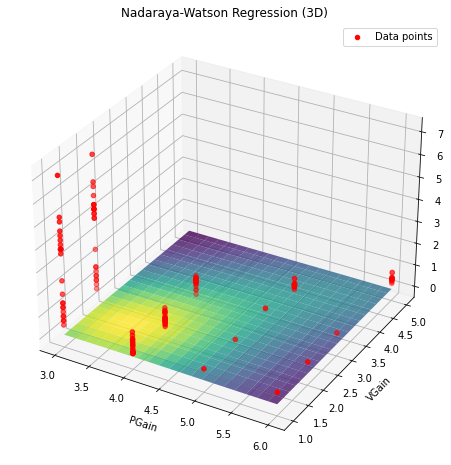

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

servo_data = pd.read_csv('servo.data', header=None, names=['motor', 'screw', 'pgain', 'vgain', 'class'])
servo_data['class'] = servo_data['class'].astype(float)

# Выборка данных
X = servo_data[['pgain', 'vgain']]
y = servo_data['class']

# Определение модели
kde = KernelDensity(bandwidth=1.0)
kde.fit(X)

# Создание сетки для построения 3D-графика
pgain_min, pgain_max = X['pgain'].min(), X['pgain'].max()
vgain_min, vgain_max = X['vgain'].min(), X['vgain'].max()
pgain_range = np.linspace(pgain_min, pgain_max, 100)
vgain_range = np.linspace(vgain_min, vgain_max, 100)
pgain_grid, vgain_grid = np.meshgrid(pgain_range, vgain_range)
xy_grid = np.c_[pgain_grid.ravel(), vgain_grid.ravel()]

# Оценка плотности на сетке
log_density = kde.score_samples(xy_grid)
density = np.exp(log_density).reshape(pgain_grid.shape)

# Построение 3D-графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(pgain_grid, vgain_grid, density, cmap='viridis', rstride=5, cstride=5, alpha=0.8)
ax.scatter(X['pgain'], X['vgain'], y, c='r', marker='o', label='Data points')
ax.set_xlabel('PGain')
ax.set_ylabel('VGain')
ax.set_zlabel('Class')
ax.set_title('Nadaraya-Watson Regression (3D)')
ax.legend()
plt.show()

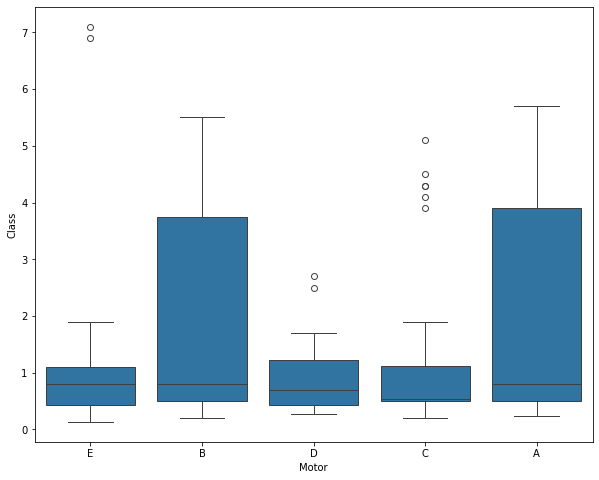

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

servo_data = pd.read_csv('servo.data', header=None, names=['motor', 'screw', 'pgain', 'vgain', 'class'])
servo_data['class'] = servo_data['class'].astype(float)

plt.figure(figsize=(10, 8))
sns.boxplot(x='motor', y='class', data=servo_data)
plt.xlabel('Motor')
plt.ylabel('Class')
plt.show()

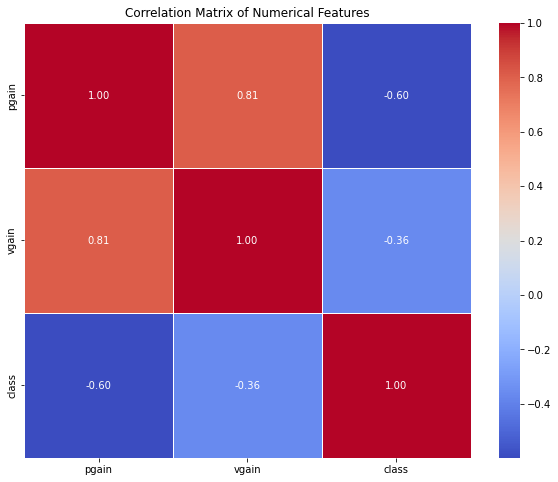

In [71]:
servo_data = pd.read_csv('servo.data', header=None, names=['motor', 'screw', 'pgain', 'vgain', 'class'])
servo_data['class'] = servo_data['class'].astype(float)

# Выбор числовых признаков
numerical_features = servo_data[['pgain', 'vgain', 'class']]

# Построение матрицы корреляции
correlation_matrix = numerical_features.corr()

# Визуализация матрицы корреляции с использованием тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

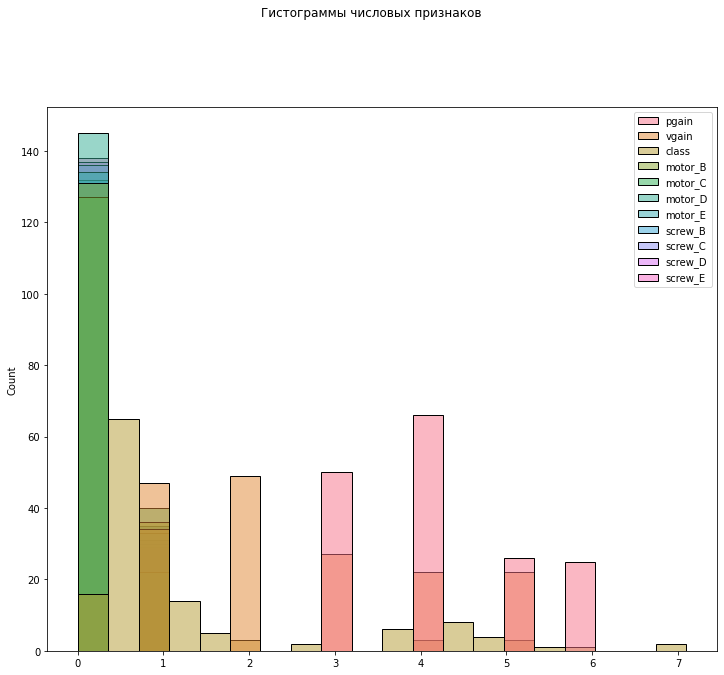

In [67]:
servo_data = pd.read_csv('servo.data', header=None, names=['motor', 'screw', 'pgain', 'vgain', 'class'])
servo_data['class'] = servo_data['class'].astype(float)

data_encoded = pd.get_dummies(servo_data, columns=['motor', 'screw'], drop_first=True)

plt.figure(figsize=(12, 10))
sns.histplot(data_encoded, bins=20, color='green')
plt.suptitle('Гистограммы числовых признаков', y=1.02)
plt.show()

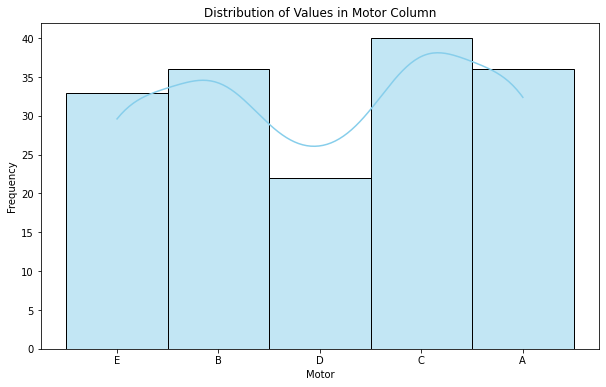

In [48]:
servo_data = pd.read_csv('servo.data', header=None, names=['motor', 'screw', 'pgain', 'vgain', 'class'])
servo_data['class'] = servo_data['class'].astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(servo_data['motor'], bins=20, kde=True, color='skyblue')
plt.xlabel('Motor')
plt.ylabel('Frequency')
plt.title('Distribution of Values in Motor Column')
plt.show()


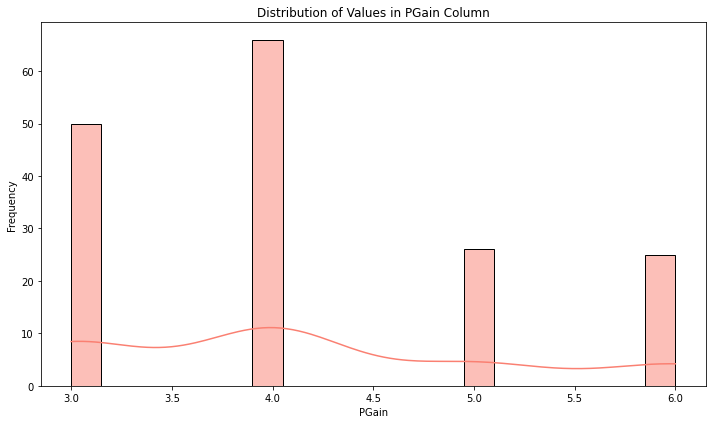

In [69]:
servo_data = pd.read_csv('servo.data', header=None, names=['motor', 'screw', 'pgain', 'vgain', 'class'])
servo_data['class'] = servo_data['class'].astype(float)

# Визуализация распределения значений в столбце 'pgain'
plt.figure(figsize=(10, 6))
sns.histplot(servo_data['pgain'], bins=20, kde=True, color='salmon')
plt.xlabel('PGain')
plt.ylabel('Frequency')
plt.title('Distribution of Values in PGain Column')

plt.tight_layout()
plt.show()
